In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras




In [2]:
import numpy as np
import os
import time

from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten


from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [75]:
from keras.models import load_model
from PIL import Image
import matplotlib.image as mpimg


In [4]:

# set the matplotlib backend so figures can be saved in the background
import matplotlib
%pylab inline
matplotlib.use("Agg")
# import the necessary packages

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import argparse

In [7]:
keras.__version__

'2.4.0'

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input,decode_predictions


In [34]:
model = ResNet50(include_top=True,weights='imagenet')
model.summary()
model.layers[-1].get_config()
img_path = '/Users/andywu98/Downloads/IMG_1572.JPG'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Predicted: [[('n04357314', 'sunscreen', 0.5666569), ('n09428293', 'seashore', 0.12109709), ('n04251144', 'snorkel', 0.08899241), ('n02837789', 'bikini', 0.043503456), ('n02807133', 'bathing_cap', 0.02760555)]]


In [32]:
PATH = '/Users/andywu98/Desktop/tensorflow'
# Define data path
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)
counter=0
img_data_list=[]
img_counter_dict={}
for dataset in data_dir_list:
    if dataset != '.DS_Store':
        img_list=os.listdir(data_path+'/'+dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            if img != '.DS_Store':
                img_path = data_path + '/'+ dataset + '/'+ img 
                print(img_path)
                img = image.load_img(img_path, target_size=(224, 224))
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                counter+=1
                print('Input image shape:', x.shape,'img number:',counter)
                img_data_list.append(x)
                img_counter_dict[dataset]= counter
            

img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)





Loaded the images of dataset-forest

/Users/andywu98/Desktop/tensorflow/data/forest/Tongass-National-Forest_Alaska_USA.jpg
Input image shape: (1, 224, 224, 3) img number: 1
/Users/andywu98/Desktop/tensorflow/data/forest/Bialowieza-National-Park_Podlaskie_Poland.jpg
Input image shape: (1, 224, 224, 3) img number: 2
/Users/andywu98/Desktop/tensorflow/data/forest/Miombo-Woodlands_Nyika_Tazania.jpg
Input image shape: (1, 224, 224, 3) img number: 3
/Users/andywu98/Desktop/tensorflow/data/forest/Xishuangbanna_Yunnan_China.jpg
Input image shape: (1, 224, 224, 3) img number: 4
/Users/andywu98/Desktop/tensorflow/data/forest/Black-Forest_Baden-Württemberg_Germany.jpg
Input image shape: (1, 224, 224, 3) img number: 5
/Users/andywu98/Desktop/tensorflow/data/forest/Gir-Forest-National-Park_Gujarat_India.jpeg
Input image shape: (1, 224, 224, 3) img number: 6
/Users/andywu98/Desktop/tensorflow/data/forest/Sumatra-Rainforest_Sumatra_Indonesia.jpg
Input image shape: (1, 224, 224, 3) img number: 7
/User

Input image shape: (1, 224, 224, 3) img number: 74
/Users/andywu98/Desktop/tensorflow/data/monuments/Ange au sourire_Champagne_France.jpg
Input image shape: (1, 224, 224, 3) img number: 75
/Users/andywu98/Desktop/tensorflow/data/monuments/Goethe_Vienna_Austria.jpg
Input image shape: (1, 224, 224, 3) img number: 76
/Users/andywu98/Desktop/tensorflow/data/monuments/Aphrodite_Vatican_Vatican.jpg
Input image shape: (1, 224, 224, 3) img number: 77
/Users/andywu98/Desktop/tensorflow/data/monuments/Buddha_Colombo_Sri Lanka.jpg
Input image shape: (1, 224, 224, 3) img number: 78
/Users/andywu98/Desktop/tensorflow/data/monuments/Jean Bart_Nord P.-de-C._France.jpg
Input image shape: (1, 224, 224, 3) img number: 79
/Users/andywu98/Desktop/tensorflow/data/monuments/Angel statue_Copenhagen_Denmark.jpg
Input image shape: (1, 224, 224, 3) img number: 80
/Users/andywu98/Desktop/tensorflow/data/monuments/Garuda_Patan_Nepal.jpg
Input image shape: (1, 224, 224, 3) img number: 81
Loaded the images of datas

Input image shape: (1, 224, 224, 3) img number: 144
/Users/andywu98/Desktop/tensorflow/data/lake/Lajes do Pico_Pico_Azores.jpg
Input image shape: (1, 224, 224, 3) img number: 145
/Users/andywu98/Desktop/tensorflow/data/lake/Lake Escalier_Laurentides_Canada.jpg
Input image shape: (1, 224, 224, 3) img number: 146
/Users/andywu98/Desktop/tensorflow/data/lake/Eidsdal_Ålesund_Norway.jpg
Input image shape: (1, 224, 224, 3) img number: 147
/Users/andywu98/Desktop/tensorflow/data/lake/Lake Nasser_Lake Nasser_Egypt.jpg
Input image shape: (1, 224, 224, 3) img number: 148
/Users/andywu98/Desktop/tensorflow/data/lake/Lake Brochets_Lake Saint-Jean_Canada.jpg
Input image shape: (1, 224, 224, 3) img number: 149
/Users/andywu98/Desktop/tensorflow/data/lake/Kasr Ibrim_Lake Nasser_Egypt.jpg
Input image shape: (1, 224, 224, 3) img number: 150
/Users/andywu98/Desktop/tensorflow/data/lake/Lake Mont-Tremblant_Laurentides_Canada.jpg
Input image shape: (1, 224, 224, 3) img number: 151
/Users/andywu98/Desktop/

Input image shape: (1, 224, 224, 3) img number: 207
/Users/andywu98/Desktop/tensorflow/data/ancient/Sphinx_Cairo_Egypt.jpg
Input image shape: (1, 224, 224, 3) img number: 208
/Users/andywu98/Desktop/tensorflow/data/ancient/Concord_Agrigento_Italy.jpg
Input image shape: (1, 224, 224, 3) img number: 209
/Users/andywu98/Desktop/tensorflow/data/ancient/Temple of Hera_Agrigento_Italy.jpg
Input image shape: (1, 224, 224, 3) img number: 210
/Users/andywu98/Desktop/tensorflow/data/ancient/Kom Ombo_Edfu_Egypt.jpg
Input image shape: (1, 224, 224, 3) img number: 211
/Users/andywu98/Desktop/tensorflow/data/ancient/Antoninus Gate_Sbeitla_Tunisia.jpg
Input image shape: (1, 224, 224, 3) img number: 212
/Users/andywu98/Desktop/tensorflow/data/ancient/Olympic site_Barcelona_Spain.jpg
Input image shape: (1, 224, 224, 3) img number: 213
/Users/andywu98/Desktop/tensorflow/data/ancient/Roman theatre_Verona_Italy.jpg
Input image shape: (1, 224, 224, 3) img number: 214
/Users/andywu98/Desktop/tensorflow/data

Input image shape: (1, 224, 224, 3) img number: 273
/Users/andywu98/Desktop/tensorflow/data/seaside/Giottani_Corsica_France.jpg
Input image shape: (1, 224, 224, 3) img number: 274
/Users/andywu98/Desktop/tensorflow/data/seaside/Pointe du Van_Britain_France.jpg
Input image shape: (1, 224, 224, 3) img number: 275
/Users/andywu98/Desktop/tensorflow/data/seaside/Bonifacio_Corsica_France.jpg
Input image shape: (1, 224, 224, 3) img number: 276
/Users/andywu98/Desktop/tensorflow/data/seaside/Golfe de Valinco_Corsica_France.jpg
Input image shape: (1, 224, 224, 3) img number: 277
/Users/andywu98/Desktop/tensorflow/data/seaside/Arzachena_Sardinia_Italy.jpg
Input image shape: (1, 224, 224, 3) img number: 278
/Users/andywu98/Desktop/tensorflow/data/seaside/Bantry Bay_Cape Town_South Africa.jpg
Input image shape: (1, 224, 224, 3) img number: 279
/Users/andywu98/Desktop/tensorflow/data/seaside/Amalfi_Naples_Italy.jpg
Input image shape: (1, 224, 224, 3) img number: 280
/Users/andywu98/Desktop/tensorf

Input image shape: (1, 224, 224, 3) img number: 339
/Users/andywu98/Desktop/tensorflow/data/plains/Ovt_Khangai_Mongolia.jpg
Input image shape: (1, 224, 224, 3) img number: 340
/Users/andywu98/Desktop/tensorflow/data/plains/Boré_Timbuktu_Mali.jpg
Input image shape: (1, 224, 224, 3) img number: 341
/Users/andywu98/Desktop/tensorflow/data/plains/Argalant_Qaraqorum_Mongolia.jpg
Input image shape: (1, 224, 224, 3) img number: 342
/Users/andywu98/Desktop/tensorflow/data/plains/Arta_Ghoubbet_Djibouti.jpg
Input image shape: (1, 224, 224, 3) img number: 343
/Users/andywu98/Desktop/tensorflow/data/plains/African hut_Lubombo_Swaziland.jpg
Input image shape: (1, 224, 224, 3) img number: 344
Loaded the images of dataset-european-architecture

/Users/andywu98/Desktop/tensorflow/data/european-architecture/Aÿ_Champagne_France.jpg
Input image shape: (1, 224, 224, 3) img number: 345
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Bourges_Berry_France.jpg
Input image shape: (1, 224, 224, 3)

Input image shape: (1, 224, 224, 3) img number: 400
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Assembly Hall_Edinburgh_United Kingdom.jpg
Input image shape: (1, 224, 224, 3) img number: 401
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Breteuil_Paris_France.jpg
Input image shape: (1, 224, 224, 3) img number: 402
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Balleroy_Normandy_France.jpg
Input image shape: (1, 224, 224, 3) img number: 403
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Buckingham_London_United Kingdom.jpg
Input image shape: (1, 224, 224, 3) img number: 404
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Cambron gate_Toledo_Spain.jpg
Input image shape: (1, 224, 224, 3) img number: 405
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Edinburgh_Edinburgh_United Kingdom.jpg
Input image shape: (1, 224, 224, 3) img number: 406
/Users/andywu98/Desktop/tensorflow/data/european-architectur

Input image shape: (1, 224, 224, 3) img number: 462
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Creully_Normandy_France.jpg
Input image shape: (1, 224, 224, 3) img number: 463
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Armeria square_Madrid_Spain.jpg
Input image shape: (1, 224, 224, 3) img number: 464
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Boscherville_Normandy_France.jpg
Input image shape: (1, 224, 224, 3) img number: 465
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Carrouges_Normandy_France.jpg
Input image shape: (1, 224, 224, 3) img number: 466
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Acquigny_Normandy_France.jpg
Input image shape: (1, 224, 224, 3) img number: 467
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Abbesses_Paris_France.jpg
Input image shape: (1, 224, 224, 3) img number: 468
/Users/andywu98/Desktop/tensorflow/data/european-architecture/Abbey of Beauport_Britai

Input image shape: (1, 224, 224, 3) img number: 523
/Users/andywu98/Desktop/tensorflow/data/beach/Agios Georgios_Corfu_Greece.jpg
Input image shape: (1, 224, 224, 3) img number: 524
/Users/andywu98/Desktop/tensorflow/data/beach/Torri del Benaco_L Garda_Italy.jpg
Input image shape: (1, 224, 224, 3) img number: 525
/Users/andywu98/Desktop/tensorflow/data/beach/Calodyne beach_Cap Malheureux_Mauritius.jpg
Input image shape: (1, 224, 224, 3) img number: 526
/Users/andywu98/Desktop/tensorflow/data/beach/Flic en Flac_Flic en Flac_Mauritius.jpg
Input image shape: (1, 224, 224, 3) img number: 527
/Users/andywu98/Desktop/tensorflow/data/beach/Dinard_Britain_France.jpg
Input image shape: (1, 224, 224, 3) img number: 528
/Users/andywu98/Desktop/tensorflow/data/beach/Bajo de los Sables_Lanzarote_Canary Islands.jpg
Input image shape: (1, 224, 224, 3) img number: 529
/Users/andywu98/Desktop/tensorflow/data/beach/Anse Bébé_Marie-Galante_Guadeloupe.jpg
Input image shape: (1, 224, 224, 3) img number: 53

Input image shape: (1, 224, 224, 3) img number: 587
/Users/andywu98/Desktop/tensorflow/data/beach/Campomoro_Corsica_France.jpg
Input image shape: (1, 224, 224, 3) img number: 588
/Users/andywu98/Desktop/tensorflow/data/beach/Agosta_Corsica_France.jpg
Input image shape: (1, 224, 224, 3) img number: 589
/Users/andywu98/Desktop/tensorflow/data/beach/Saint-François_Grande-Terre_Guadeloupe.jpg
Input image shape: (1, 224, 224, 3) img number: 590
/Users/andywu98/Desktop/tensorflow/data/beach/Massacre beach_Marie-Galante_Guadeloupe.jpg
Input image shape: (1, 224, 224, 3) img number: 591
/Users/andywu98/Desktop/tensorflow/data/beach/Embrazure beach_Souillac_Mauritius.jpg
Input image shape: (1, 224, 224, 3) img number: 592
/Users/andywu98/Desktop/tensorflow/data/beach/Noirmoutier island_Poitou-Charentes_France.jpg
Input image shape: (1, 224, 224, 3) img number: 593
/Users/andywu98/Desktop/tensorflow/data/beach/Gosier beach_Grande-Terre_Guadeloupe.jpg
Input image shape: (1, 224, 224, 3) img numbe

Input image shape: (1, 224, 224, 3) img number: 654
/Users/andywu98/Desktop/tensorflow/data/castle/Crac des Chevaliers_Crac des Chevaliers_Syria.jpg
Input image shape: (1, 224, 224, 3) img number: 655
/Users/andywu98/Desktop/tensorflow/data/castle/Rock of Cashel_Kilkenny_Ireland.jpg
Input image shape: (1, 224, 224, 3) img number: 656
/Users/andywu98/Desktop/tensorflow/data/castle/Carel castle_Normandy_France.jpg
Input image shape: (1, 224, 224, 3) img number: 657
/Users/andywu98/Desktop/tensorflow/data/castle/Château-Gaillard_Normandy_France.jpg
Input image shape: (1, 224, 224, 3) img number: 658
/Users/andywu98/Desktop/tensorflow/data/castle/Castle of Gien_Val de Loire_France.jpg
Input image shape: (1, 224, 224, 3) img number: 659
/Users/andywu98/Desktop/tensorflow/data/castle/Brézé castle_Val de Loire_France.jpg
Input image shape: (1, 224, 224, 3) img number: 660
/Users/andywu98/Desktop/tensorflow/data/castle/Culan castle_Berry_France.jpg
Input image shape: (1, 224, 224, 3) img numbe

Input image shape: (1, 224, 224, 3) img number: 719
/Users/andywu98/Desktop/tensorflow/data/mountains/Bichlbach_Tirol_Austria.jpg
Input image shape: (1, 224, 224, 3) img number: 720
/Users/andywu98/Desktop/tensorflow/data/mountains/Mount Pelée_Saint-Pierre_Martinique.jpg
Input image shape: (1, 224, 224, 3) img number: 721
/Users/andywu98/Desktop/tensorflow/data/mountains/Gudô do Marinho_Santa Antão_Cape Verde.jpg
Input image shape: (1, 224, 224, 3) img number: 722
/Users/andywu98/Desktop/tensorflow/data/mountains/San Pedro Volcano_San Pedro de Atacama_Chile.jpg
Input image shape: (1, 224, 224, 3) img number: 723
/Users/andywu98/Desktop/tensorflow/data/mountains/Zugspitze_Tirol_Austria.jpg
Input image shape: (1, 224, 224, 3) img number: 724
/Users/andywu98/Desktop/tensorflow/data/mountains/Mandarfen_Tirol_Austria.jpg
Input image shape: (1, 224, 224, 3) img number: 725
/Users/andywu98/Desktop/tensorflow/data/mountains/Habicht_Tirol_Austria.jpg
Input image shape: (1, 224, 224, 3) img numb

Input image shape: (1, 224, 224, 3) img number: 784
/Users/andywu98/Desktop/tensorflow/data/mountains/Gletsch_Zermatt_Switzerland.jpg
Input image shape: (1, 224, 224, 3) img number: 785
/Users/andywu98/Desktop/tensorflow/data/mountains/Evisa_Corsica_France.jpg
Input image shape: (1, 224, 224, 3) img number: 786
/Users/andywu98/Desktop/tensorflow/data/mountains/Les Mamelles_Basse-Terre_Guadeloupe.jpg
Input image shape: (1, 224, 224, 3) img number: 787
/Users/andywu98/Desktop/tensorflow/data/mountains/Hollersbach_Grossglockner_Austria.jpg
Input image shape: (1, 224, 224, 3) img number: 788
/Users/andywu98/Desktop/tensorflow/data/mountains/Beagle Channel_Ushuaia_Argentina.jpg
Input image shape: (1, 224, 224, 3) img number: 789
/Users/andywu98/Desktop/tensorflow/data/mountains/Matterhorn_Zermatt_Switzerland.jpg
Input image shape: (1, 224, 224, 3) img number: 790
/Users/andywu98/Desktop/tensorflow/data/mountains/Mont Toubkal_Tizi n_Test_Morocco.jpg
Input image shape: (1, 224, 224, 3) img nu

Input image shape: (1, 224, 224, 3) img number: 847
/Users/andywu98/Desktop/tensorflow/data/metropolitan/Brooklyn - Borough Hall_New York_United States.jpg
Input image shape: (1, 224, 224, 3) img number: 848
/Users/andywu98/Desktop/tensorflow/data/metropolitan/Beresford building_New York_United States.jpg
Input image shape: (1, 224, 224, 3) img number: 849
/Users/andywu98/Desktop/tensorflow/data/metropolitan/Lower Manhattan_New York_United States.jpg
Input image shape: (1, 224, 224, 3) img number: 850
/Users/andywu98/Desktop/tensorflow/data/metropolitan/Bund_Shanghai_China.jpg
Input image shape: (1, 224, 224, 3) img number: 851
/Users/andywu98/Desktop/tensorflow/data/metropolitan/London Eye_London_United Kingdom.jpg
Input image shape: (1, 224, 224, 3) img number: 852
/Users/andywu98/Desktop/tensorflow/data/metropolitan/Manhattan towers_New York_United States.jpg
Input image shape: (1, 224, 224, 3) img number: 853
/Users/andywu98/Desktop/tensorflow/data/metropolitan/Balloons store_New Y

In [33]:
img_counter_dict

{'forest': 32,
 'monuments': 81,
 'lake': 167,
 'ancient': 242,
 'middle-eastern-architecture': 266,
 'seaside': 304,
 'plains': 344,
 'european-architecture': 518,
 'beach': 625,
 'castle': 663,
 'desert': 715,
 'mountains': 796,
 'asian-architecture': 842,
 'metropolitan': 897}

In [34]:
# Define the number of classes
num_classes = 14
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:32]=0
labels[32:81]=1
labels[81:167]=2
labels[167:242]=3
labels[242:266]=4
labels[266:304]=5
labels[304:344]=6
labels[344:518]=7
labels[518:625]=8
labels[625:663]=9
labels[663:715]=10
labels[715:796]=11
labels[769:842]=12
labels[842:]=13


names = ['forest','monuments','lake','ancient','middle-eastern-architecture','seaside','plains','european-architecture','beach','castle','desert','mountains','asian-architecture','metropolitan']
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [35]:
X,y = shuffle(img_data,Y, random_state=10)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=10)



In [36]:
INIT_LR = 1e-4
BS = 32
NUM_EPOCHS = 200



In [37]:
trainAug = ImageDataGenerator(
	rotation_range=25,
	zoom_range=0.1,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest")
# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()
# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean



In [38]:
trainGen = trainAug.flow(
    x=X_train,
    y=y_train,
	shuffle=True,
	batch_size=BS)

# initialize the validation generator
valGen = valAug.flow(
    x=X_val,
    y=y_val,
	shuffle=True,
	batch_size=BS)

# initialize the testing generator
testGen = valAug.flow(
    x=X_test,
    y=y_test,
	shuffle=False,
	batch_size=BS)



In [39]:
print("[INFO] preparing model...")
baseModel = ResNet50(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(14, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False

[INFO] preparing model...


In [40]:
totalTrain=len(X_train)
totalVal=len(X_val)
totalTest=len(X_test)



In [41]:
# compile the model
opt = Adam(lr=INIT_LR, decay=INIT_LR / NUM_EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the model
print("[INFO] training model...")
H = model.fit_generator(
	trainGen,
	steps_per_epoch=totalTrain /BS,
	validation_data=valGen,
	validation_steps=totalVal /BS,
	epochs=NUM_EPOCHS)



[INFO] training model...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
17/16 [==============================] - 65s 4s/step - loss: 3.1981 - accuracy: 0.1136 - val_loss: 2.3662 - val_accuracy: 0.2944
Epoch 2/200
17/16 [==============================] - 63s 4s/step - loss: 2.5120 - accuracy: 0.2886 - val_loss: 2.0061 - val_accuracy: 0.4056
Epoch 3/200
17/16 [==============================] - 62s 4s/step - loss: 2.1241 - accuracy: 0.3706 - val_loss: 1.7940 - val_accuracy: 0.4333
Epoch 4/200
17/16 [==============================] - 60s 4s/step - loss: 1.8865 - accuracy: 0.4246 - val_loss: 1.6604 - val_accuracy: 0.5056
Epoch 5/200
17/16 [==============================] - 61s 4s/step - loss: 1.7239 - accuracy: 0.4525 - val_loss: 1.5458 - val_accuracy: 0.5611
Epoch 6/200
17/16 [==============================] - 62s 4s/step - loss: 1.5907 - accuracy: 0.4953 - val_loss: 1.4564 - val_accuracy: 0.5833
Epoch 7/200
17/16 [==============================] - 

Epoch 57/200
17/16 [==============================] - 67s 4s/step - loss: 0.3090 - accuracy: 0.9162 - val_loss: 1.0788 - val_accuracy: 0.6444
Epoch 58/200
17/16 [==============================] - 57s 3s/step - loss: 0.3129 - accuracy: 0.9013 - val_loss: 1.0579 - val_accuracy: 0.6500
Epoch 59/200
17/16 [==============================] - 57s 3s/step - loss: 0.3182 - accuracy: 0.9050 - val_loss: 1.0465 - val_accuracy: 0.6500
Epoch 60/200
17/16 [==============================] - 58s 3s/step - loss: 0.2792 - accuracy: 0.9311 - val_loss: 1.0525 - val_accuracy: 0.6500
Epoch 61/200
17/16 [==============================] - 58s 3s/step - loss: 0.2795 - accuracy: 0.9069 - val_loss: 1.0847 - val_accuracy: 0.6389
Epoch 62/200
17/16 [==============================] - 58s 3s/step - loss: 0.3261 - accuracy: 0.8976 - val_loss: 1.0599 - val_accuracy: 0.6333
Epoch 63/200
17/16 [==============================] - 58s 3s/step - loss: 0.3150 - accuracy: 0.8957 - val_loss: 1.0531 - val_accuracy: 0.6500
Epoch 

17/16 [==============================] - 59s 3s/step - loss: 0.0718 - accuracy: 0.9851 - val_loss: 1.2596 - val_accuracy: 0.6611
Epoch 172/200
17/16 [==============================] - 59s 3s/step - loss: 0.0922 - accuracy: 0.9777 - val_loss: 1.2398 - val_accuracy: 0.6500
Epoch 173/200
17/16 [==============================] - 59s 3s/step - loss: 0.0682 - accuracy: 0.9870 - val_loss: 1.2204 - val_accuracy: 0.6500
Epoch 174/200
17/16 [==============================] - 59s 3s/step - loss: 0.0739 - accuracy: 0.9907 - val_loss: 1.2271 - val_accuracy: 0.6333
Epoch 175/200
17/16 [==============================] - 59s 3s/step - loss: 0.0671 - accuracy: 0.9907 - val_loss: 1.2301 - val_accuracy: 0.6389
Epoch 176/200
17/16 [==============================] - 59s 3s/step - loss: 0.0765 - accuracy: 0.9870 - val_loss: 1.2412 - val_accuracy: 0.6500
Epoch 177/200
17/16 [==============================] - 59s 3s/step - loss: 0.0733 - accuracy: 0.9832 - val_loss: 1.2563 - val_accuracy: 0.6389
Epoch 178/200

In [27]:
MODEL_PATH='/Users/andywu98/Desktop/andrew_wu_project_5/resnet50model2'



In [42]:
y_test_gen=np.argmax(y_test, axis=1)



In [43]:
print("[INFO] evaluating network...")
testGen.reset()
predIdxs = model.predict_generator(testGen,
	steps=(totalTest / BS) + 1)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(y_test_gen, predIdxs,
	target_names=names))
# serialize the model to disk
#print("[INFO] saving model...")
#model.save(MODEL_PATH, save_format="h5")



[INFO] evaluating network...
Instructions for updating:
Please use Model.predict, which supports generators.
                             precision    recall  f1-score   support

                     forest       1.00      0.75      0.86         8
                  monuments       0.67      0.92      0.77        13
                       lake       0.81      0.59      0.68        22
                    ancient       0.90      0.41      0.56        22
middle-eastern-architecture       0.40      0.50      0.44         4
                    seaside       0.25      0.67      0.36         3
                     plains       0.60      1.00      0.75         6
      european-architecture       0.68      0.76      0.72        34
                      beach       1.00      0.88      0.94        25
                     castle       0.20      0.22      0.21         9
                     desert       0.43      1.00      0.60         3
                  mountains       0.60      0.75      0.67    

In [39]:
model = load_model('/Users/andywu98/Desktop/andrew_wu_project_5/resnet_model')



In [46]:

import random



In [96]:
def recomender(img_path,num_of_recommendations):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    category_pred=names[np.argmax(preds)]
    print('We see you like '+category_pred+' destinations')
    for i in range (num_of_recommendations):
        choice=random.choice(os.listdir("/Users/andywu98/Desktop/tensorflow/data/"+category_pred))
        if choice == '.DS_Store':
            choice=random.choice(os.listdir("/Users/andywu98/Desktop/tensorflow/data/"+category_pred))
        else:
            choice_img=image.load_img("/Users/andywu98/Desktop/tensorflow/data/"+category_pred+'/'+choice,grayscale=False, color_mode='rgb', target_size=None,interpolation='nearest')
            print("/Users/andywu98/Desktop/tensorflow/data/"+category_pred+'/'+choice)
            plt.figure(figsize=(20,10))
            columns=num_of_recommendations
            plt.subplot(num_of_recommendations / columns + 1, columns, i+1)
            plt.imshow(choice_img)
            plt.title(choice.split('.')[0])

    
    

We see you like: desert destinations
/Users/andywu98/Desktop/tensorflow/data/desert/Sesriem Canyon_Sossusvlei_Namibia.jpg
/Users/andywu98/Desktop/tensorflow/data/desert/Gobi Desert_Gobi desert_Mongolia.jpg
/Users/andywu98/Desktop/tensorflow/data/desert/Ijoukak_Tizi n_Test_Morocco.jpg


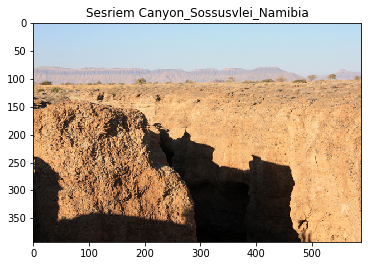

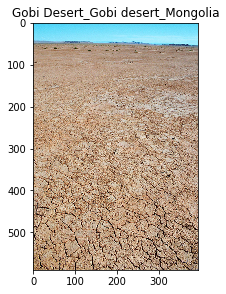

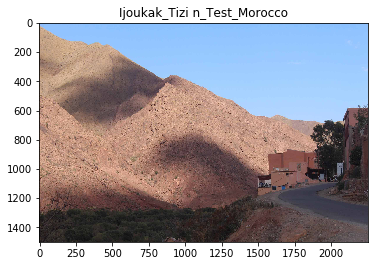

In [102]:
recomender('/Users/andywu98/Downloads/IMG_2390.JPG',3)

In [48]:
img_path = '/Users/andywu98/Downloads/0qvyj4fkpo651.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
#
preds = model.predict(x)

In [56]:
np.argmax(preds)


10